# Data Science and Business Analytics Task Solution
## The Sparks Foundation Internship
### Intern Name: Sohini Saha
### Task 2 : Prediction Using Supervised ML
#### Batch : May, 2023

## Predicting the percentage of marks that a student is expected to score based upon the number of hours they studied using linear reegression


Step 1 : Importing the required python libraries

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Step 2: Importing the data from external link

In [2]:
# Reading data from link
url = "http://bit.ly/w-data"
student_df= pd.read_csv(url)
print(student_df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


Step 3: Explonatory Data Analysis

**Data Exploration**

In [3]:
student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
student_df.shape

(25, 2)

In [5]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
distinct_hours=student_df.Hours.nunique()
print("Number of unique values of study hours is:",distinct_hours)

Number of unique values of study hours is: 23


In [7]:
distinct_scores=student_df.Scores.nunique()
print("Number of unique values of spercentage of marks is:",distinct_scores)

Number of unique values of spercentage of marks is: 23


**Checking for missing values**

In [8]:
student_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Checking for outliers using boxplot**

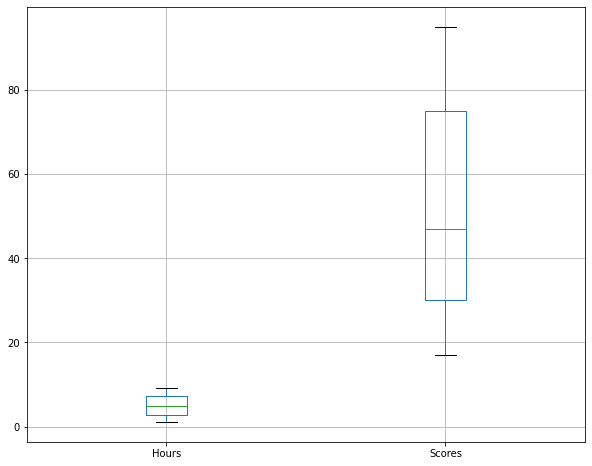

In [9]:
student_df.boxplot(figsize=(10,8))

**Data Visualization**

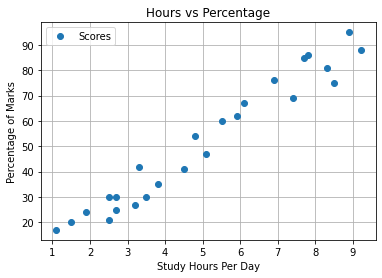

In [10]:
# Plotting the distribution of scores
student_df.plot(x='Hours', y='Scores',style='o') 
plt.title('Hours vs Percentage')  
plt.xlabel('Study Hours Per Day')  
plt.ylabel('Percentage of Marks')  
plt.grid(True)
plt.show()

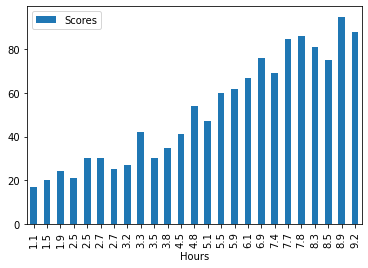

In [11]:
student_df.sort_values(['Hours'],axis=0,ascending=[True],inplace=True)
student_df.plot.bar(x='Hours',y='Scores')

Step 4: Data analysis and model fitting

**Train and Test Split**

In [12]:
x = student_df.iloc[:, :-1].values  
y = student_df.iloc[:, 1].values 

In [13]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.3, random_state=0) 

**Training the Algorthim**

In [14]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train, y_train) 

LinearRegression()

**Plotting the regression line**

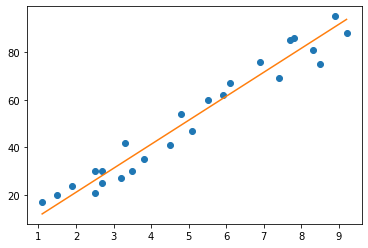

In [15]:
regression_line = model.coef_*x+model.intercept_

# Scatter plot and regression line
plt.plot(x, y, 'o')
plt.plot(x, regression_line);
plt.show()

**Model testing and Prediction of Scores**

In [16]:
print(x_test) # Testing data - In Hours

[[2.7]
 [1.9]
 [7.7]
 [6.1]
 [4.5]
 [8.5]
 [6.9]
 [9.2]]


In [17]:
y_pred = model.predict(x_test) # Predicting the scores
print(y_pred)

[28.22071832 20.16434745 78.57303627 62.46029453 46.34755278 86.62940714
 70.5166654  93.67873166]


In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print("The actual scores vs the predicted scores:\n",df)

The actual scores vs the predicted scores:
    Actual  Predicted
0      30  28.220718
1      24  20.164347
2      85  78.573036
3      67  62.460295
4      41  46.347553
5      75  86.629407
6      76  70.516665
7      88  93.678732


**Checking model accuracy**

In [19]:
model_score= model.score(x_train,y_train)
print("The model accuracy is:",model_score)

The model accuracy is: 0.9563763000236766


**Predicting score of a student who studies for 9.25 hours/day**

In [20]:
#Testing with given value
hours = [[9.25]]
own_pred = model.predict(hours)
print("The predicted score of student when the study hour is 9.25 hours is:",own_pred)

The predicted score of student when the study hour is 9.25 hours is: [94.18225483]


**Evaluating Model Performance**

In [21]:
#Calculating Root Mean Squared Error
from sklearn import metrics
import math
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE= math.sqrt(MSE)
print("Root Mean Square Error:\n",RMSE)

Root Mean Square Error:
 6.184125293208643


In [22]:
#Calculating Mean Absolute Error
print('Mean Absolute Error:\n',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error:
 5.590078701239448
